### Competition baseline example -  WORK IN PROGRESS!


# MosquitoAlert 2023 - AIcrowd competition

## https://www.aicrowd.com/challenges/mosquitoalert-challenge-2023


Mosquitoes, small yet perilous insects, are responsible for transmitting diseases that pose a serious threat to humans and the environment. With over 3600 known species, a few of them have the ability to transmit various pathogens, leading to widespread illnesses such as Zika, Dengue, and Chikungunya. Controlling mosquito populations is vital to prevent disease outbreaks and protect communities worldwide.

**In collaboration with the Mosquito Alert citizen science project, we present the Mosquito Identification Challenge—an opportunity to impact public health initiatives directly.**

Traditional mosquito surveillance methods are expensive and time-consuming, but community-based approaches empower citizens to report and collect mosquito specimens. By leveraging machine learning and deep learning techniques, we aim to automate the labour-intensive image validation process, making mosquito identification more efficient and accurate.

<li>
Using the existing Dataset on Kaggle, I put together this 'quick & dirty' basic example.    It just reads the files and writes a simple random 'submission' file for the competition.   The hard work of model training and image analysis still needs to be done.
<li>
Hope it helps people get started on their own research with a level playing field.   BTW, Kaggle also provides 30 hours of free GPU usage  per month  🙂
<li>
Thanks to Vishak for uploading the datasets - https://www.kaggle.com/datasets/vishakkbhat/mosquito-data
<p>

    
Happy coding  😊
Michael

### Competition baseline example -  WORK IN PROGRESS!
####  Mike Pastor   6/21/2023



In [1]:
########################################################################
#     Mosquito_main.py
#
#       Locate mosquito images on the file image
#           mark the bounding box,
#               Determine the type of mosquito
#
#       Mike Pastor  June 20, 2023

#  !python -m pip install  opencv-python

import os
from datetime import datetime
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import cv2
# import tensorflow as tf
#


global_now = datetime.now()
global_current_time = global_now.strftime("%H:%M:%S")
print("##############  Mosquito-main   Starting up...  - Current Time =",
      global_current_time)


print('Starting tests...')

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

##############  Mosquito-main   Starting up...  - Current Time = 18:43:09
Starting tests...


In [2]:

#############################################################################
#    Setup the submission file using th example as a base
#
#
def prepareSubmissionFile():
    
    myDictionary = {'albopictus': 0, 'culex': 1, 'anopheles': 2,
                    'culiseta': 3, 'japonicus/koreicus': 4, 'aegypti': 5}
    keyList = list(myDictionary.keys())

    submissionDF = pd.read_csv('/kaggle/input/mosquito-data/sample_submission_phase1 (1).csv')

    # For all images in the submissionDF dataset...
    #

    for idx, data in submissionDF.iterrows():
        imagePath = '/kaggle/input/mosquito-data/test_images_phase1/'
        filePath = imagePath + data.img_fName

        #  Just set the class to a RANDOM value in the Dictionary
        selection = random.randint(0, 5)
        submissionDF.loc[idx, 'class_label'] = keyList[selection]


    submissionDF.to_csv( 'MosquitoAlert-submission.csv', index=False )

    print( 'Wrote  MosquitoAlert-submission.csv  file to output')

In [3]:

############################################################################
#   Get the TRAINING metadata
# 
#
trainDF = pd.read_csv( '/kaggle/input/mosquito-data/train.csv' )

print( trainDF.head() )
print( 'trainDF  size= ', len( trainDF ))


# Setup the CLASS  Dictionary
possible_labels = trainDF.class_label.unique()
label_dict = {}

for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index

print( label_dict )



                                   img_fName  img_w  img_h  bbx_xtl  bbx_ytl  \
0  92715872-3287-4bff-aa61-7047973e5c02.jpeg   2448   3264     1301     1546   
1  b0f7cc74-2272-4756-a387-38bcaf6965c8.jpeg   3024   4032      900     1897   
2  82df4b68-0f45-4afe-9215-48488bf3720e.jpeg    768   1024      220       58   
3  331ad30a-7564-4478-b863-7bc760adf5a1.jpeg   3456   4608     1169     2364   
4  1a46dbfb-104e-466b-88d7-98958d7b1fe9.jpeg   1024   1365      129      231   

   bbx_xbr  bbx_ybr class_label  
0     1641     2096  albopictus  
1     1950     2990  albopictus  
2      659      808  albopictus  
3     1586     2826  albopictus  
4      697     1007       culex  
trainDF  size=  8025
{'albopictus': 0, 'culex': 1, 'anopheles': 2, 'culiseta': 3, 'japonicus/koreicus': 4, 'aegypti': 5}


0 /kaggle/input/mosquito-data/train_images/92715872-3287-4bff-aa61-7047973e5c02.jpeg albopictus 1301 1546
Img shape=  (3264, 2448, 3)
1 /kaggle/input/mosquito-data/train_images/b0f7cc74-2272-4756-a387-38bcaf6965c8.jpeg albopictus 900 1897
Img shape=  (4032, 3024, 3)
2 /kaggle/input/mosquito-data/train_images/82df4b68-0f45-4afe-9215-48488bf3720e.jpeg albopictus 220 58
Img shape=  (1024, 768, 3)
3 /kaggle/input/mosquito-data/train_images/331ad30a-7564-4478-b863-7bc760adf5a1.jpeg albopictus 1169 2364
Img shape=  (4608, 3456, 3)


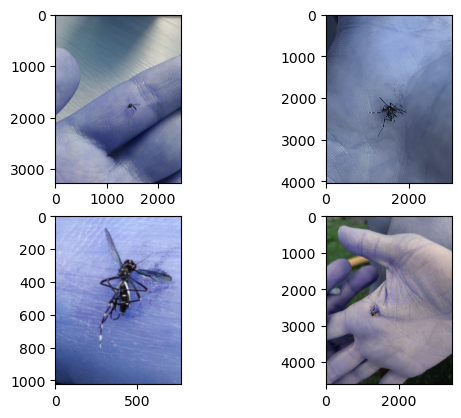

In [4]:

# For all images in the Train dataset...
#
#
fig = plt.figure()

for idx, data in trainDF.iterrows():
        
    if idx > 3:    # for now 
        break
        
    imagePath='/kaggle/input/mosquito-data/train_images/'
    filePath = imagePath + data.img_fName

    print( idx, filePath, data.class_label, data.bbx_xtl, data.bbx_ytl )

    img = cv2.imread( filePath, cv2.IMREAD_COLOR )

    print('Img shape= ', img.shape )
    
    box = int(idx + 1)
    ax1 = fig.add_subplot( 2, 2, box )
    ax1.imshow(img)
        
        
plt.show()


In [5]:
#  Use the example file as a model and
#     just set random classifications for each image
#        See the file under the 'Outputs' tab for the Notebook

prepareSubmissionFile()



Wrote  MosquitoAlert-submission.csv  file to output


In [6]:
# Mission Complete!
##################################################################################
global_later = datetime.now()
print("#####  MosquitoAlert-Baseline    - Total EXECUTION Time =", (global_later - global_now), global_later )



#####  MosquitoAlert-Baseline    - Total EXECUTION Time = 0:00:05.218940 2023-06-21 18:43:14.976257
